In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import optuna
import yfinance as yf
from datetime import datetime, timedelta

from Classification_strategies import PeakValleyStrategy, plot_price_signals

# DEFINING SIGNALS

In [10]:
## Evaluating with X Years data
years=4.5
# Get today's date
end_date = datetime.today().date()
# Set the start date to one year ago
start_date = end_date - timedelta(days=365*years)


# Select Stock
# ticker = 'AAPL'
ticker = 'NVDA'


# Download the data for the ticker
df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed

## PEAKS/VALLEYS

No penalty for number of trades

[I 2024-09-29 20:07:17,060] A new study created in memory with name: no-name-7588b09e-449a-471d-bd82-87bab0b36870
[I 2024-09-29 20:07:17,093] Trial 0 finished with value: -7.9321346792132275 and parameters: {'distance': 6, 'prominence': 4.740116758692589}. Best is trial 0 with value: -7.9321346792132275.
[I 2024-09-29 20:07:17,118] Trial 1 finished with value: -13.25847002456435 and parameters: {'distance': 8, 'prominence': 1.4837396354388523}. Best is trial 1 with value: -13.25847002456435.
[I 2024-09-29 20:07:17,146] Trial 2 finished with value: -11.146487653335353 and parameters: {'distance': 3, 'prominence': 3.462488217663588}. Best is trial 1 with value: -13.25847002456435.
[I 2024-09-29 20:07:17,173] Trial 3 finished with value: -14.851898086063791 and parameters: {'distance': 2, 'prominence': 2.0229680856786505}. Best is trial 3 with value: -14.851898086063791.
[I 2024-09-29 20:07:17,191] Trial 4 finished with value: -12.243630422981022 and parameters: {'distance': 7, 'prominenc

Optimized distance: 1
Optimized prominence: 0.10


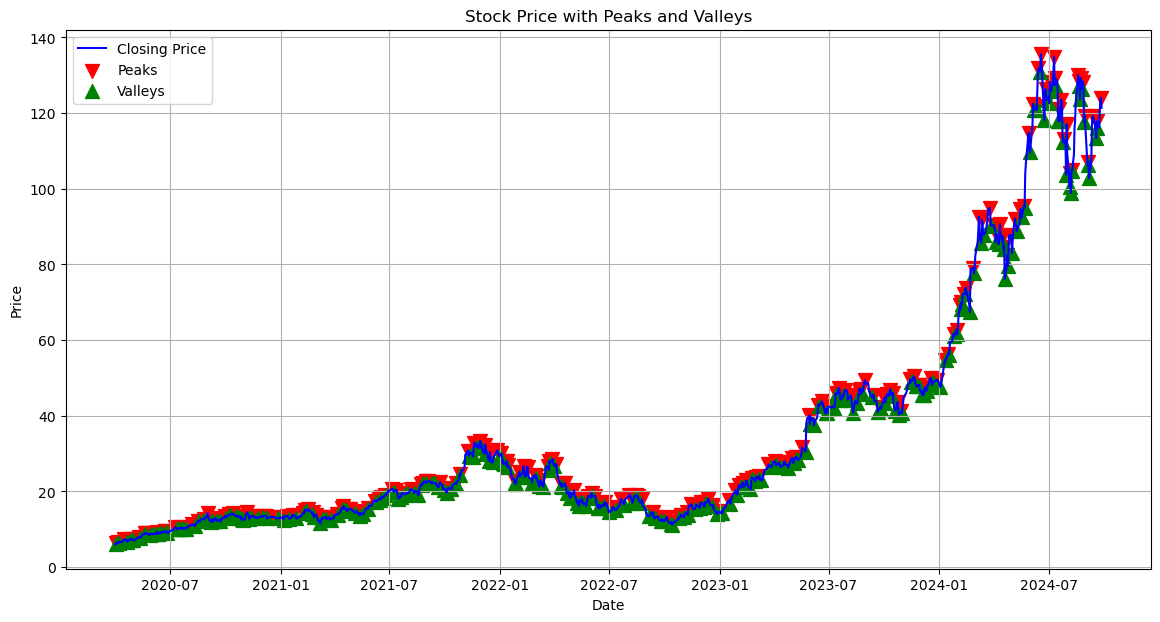

Total number of trades: 965.0
Approx nr Trades per Week: 4.266


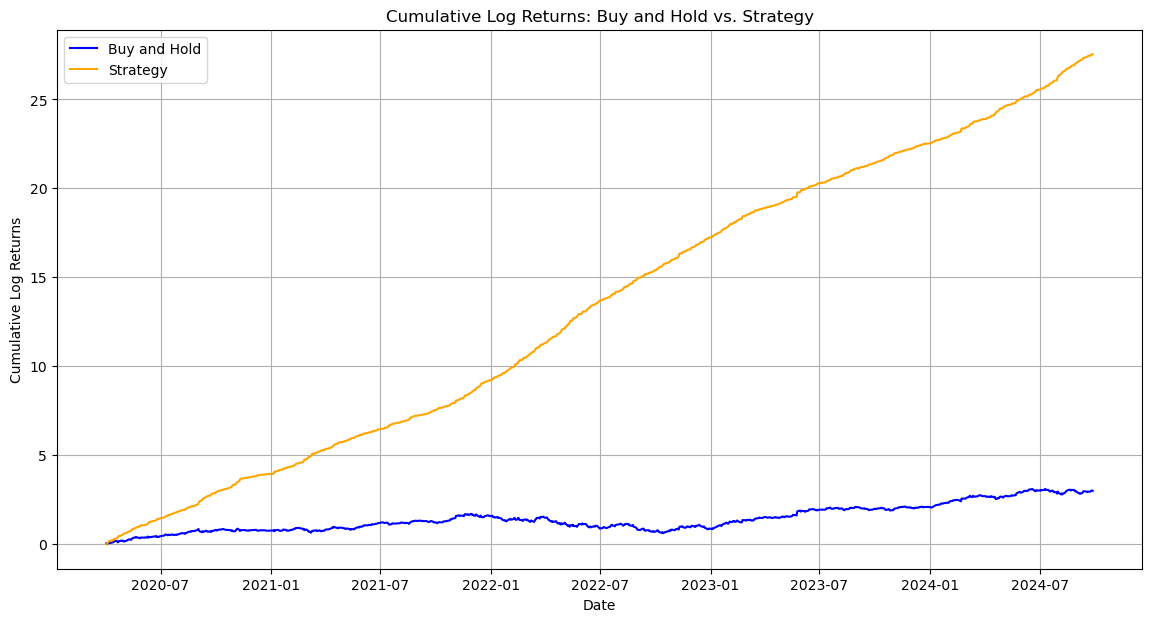

Total Buy and Hold Return: 1904.82%
Total Strategy Return: 91220386100204.77% (47889329.60 1000s Fold B&H)
Total Number of Trades: 965.0
Approx nr Trades per Week: 4.266


In [11]:
# Initialize the class with historical daily data
strategy = PeakValleyStrategy(df)

strategy.optimize_parameters()
strategy.compare_strategy_returns()

With penalty for number of trades

[I 2024-09-29 20:07:20,784] A new study created in memory with name: no-name-339ae9d3-dd09-420c-bf86-0f792d3b2b4c
[I 2024-09-29 20:07:20,796] Trial 0 finished with value: 2.3250260967053262 and parameters: {'distance': 6, 'prominence': 4.740116758692589, 'trade_off': 0.1530919518793814}. Best is trial 0 with value: 2.3250260967053262.
[I 2024-09-29 20:07:20,808] Trial 1 finished with value: 21.492204892300474 and parameters: {'distance': 3, 'prominence': 1.1831222799820977, 'trade_off': 0.13724441704749338}. Best is trial 0 with value: 2.3250260967053262.
[I 2024-09-29 20:07:20,817] Trial 2 finished with value: 8.5104806400924 and parameters: {'distance': 2, 'prominence': 2.0229680856786505, 'trade_off': 0.12361046945056185}. Best is trial 0 with value: 2.3250260967053262.
[I 2024-09-29 20:07:20,826] Trial 3 finished with value: 73.63558389902732 and parameters: {'distance': 5, 'prominence': 0.11207791788434224, 'trade_off': 0.17680643647442096}. Best is trial 0 with value: 2.325026096

Optimized distance: 1
Optimized prominence: 0.37


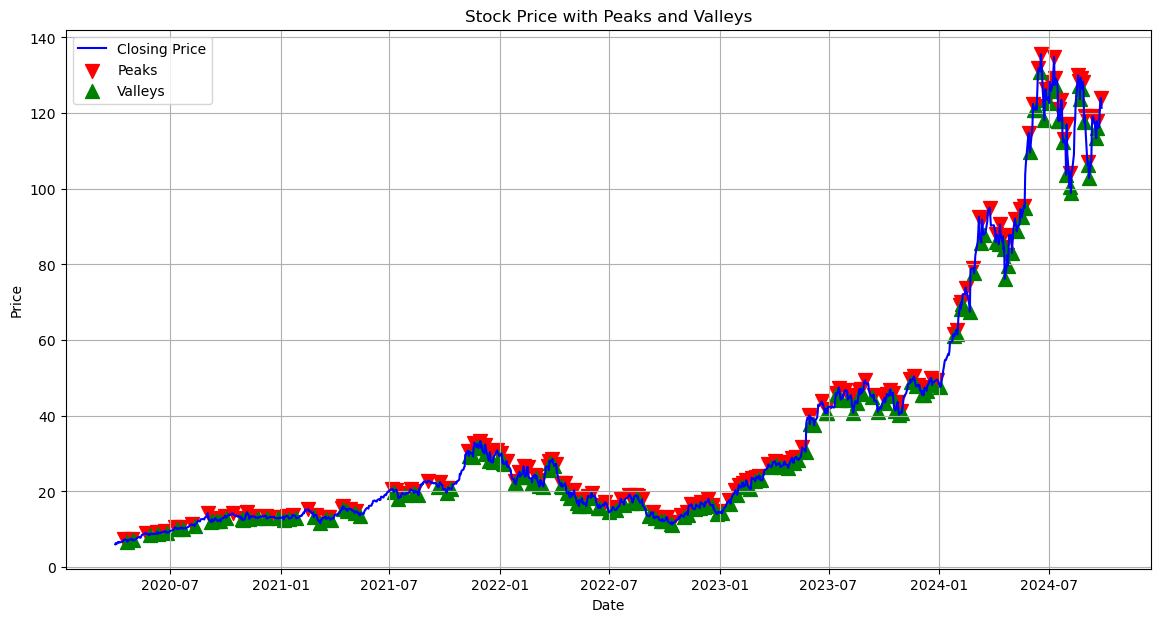

Total number of trades: 697.0
Approx nr Trades per Week: 3.081


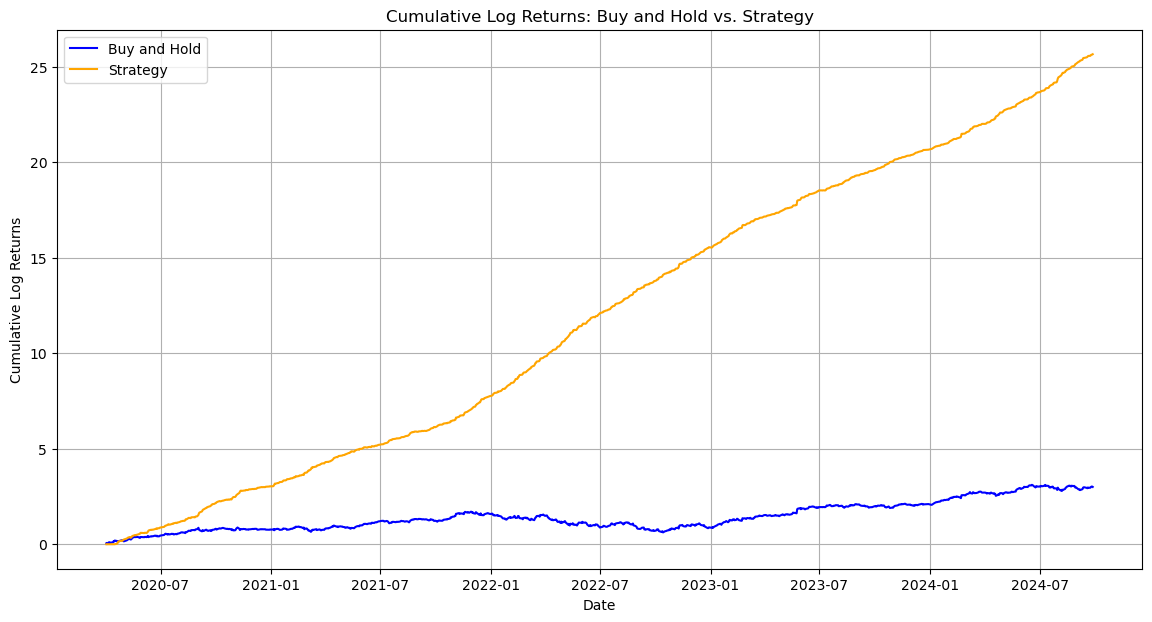

Total Buy and Hold Return: 1904.82%
Total Strategy Return: 13698710022159.14% (7191616.56 1000s Fold B&H)
Total Number of Trades: 697.0
Approx nr Trades per Week: 3.081


In [12]:
strategy.optimize_parameters(penalty=True, trade_off_max=0.2)
strategy.compare_strategy_returns()

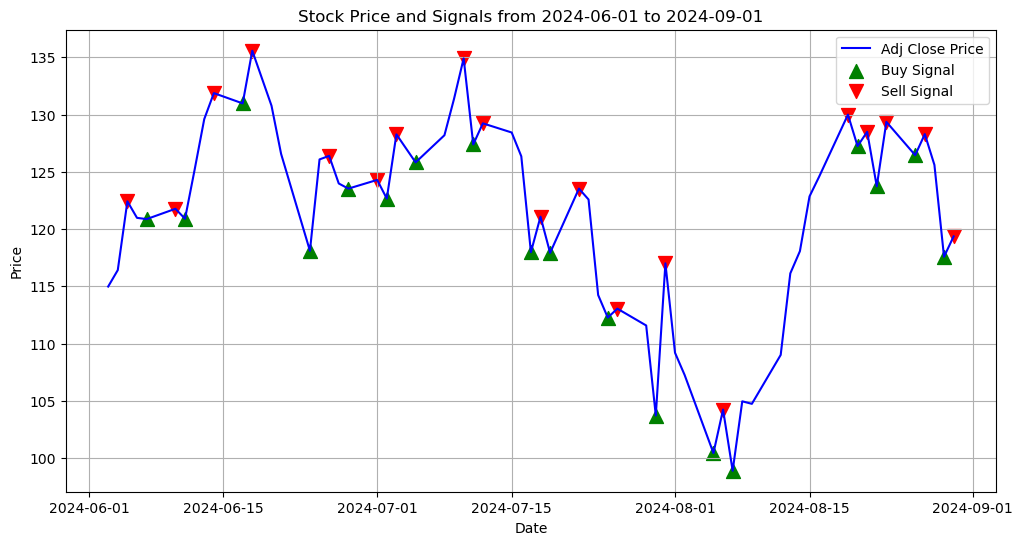

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-04-01    6.391250    6.538250    6.032000    6.076750    6.055417   
2020-04-02    6.106000    6.400000    6.057750    6.386750    6.364329   
2020-04-03    6.349000    6.390750    5.959750    6.097750    6.076344   
2020-04-06    6.381000    6.747000    6.323250    6.710000    6.686444   
2020-04-07    6.932500    6.956250    6.432500    6.475750    6.453017   
...                ...         ...         ...         ...         ...   
2024-09-23  116.550003  116.989998  114.860001  116.260002  116.260002   
2024-09-24  116.519997  121.800003  115.379997  120.870003  120.870003   
2024-09-25  122.019997  124.940002  121.610001  123.510002  123.510002   
2024-09-26  126.800003  127.669998  121.800003  124.040001  124.040001   
2024-09-27  123.970001  124.029999  119.260002  121.400002  121.400002   

               Volume        Peak  Va

In [13]:
final_df = strategy.get_signal_dataframe() #with optimized parameters
plot_price_signals(final_df, '2024-06-01', '2024-09-01', signal_col='train_target') #3 months, training trade signals
print(final_df)

In [14]:
final_df.to_csv(f'../data/{ticker}_{start_date.strftime("%Y-%m-%d")}_{end_date.strftime("%Y-%m-%d")}_peak_valley.csv')

## CUM RETURNS FOLLOWING DAYS

Defining the strategy with a dummy df

In [15]:
# # Generate a date range for 10 days
# dates = pd.date_range(start='2023-09-01', periods=10, freq='D')

# # Generate random integers to simulate log returns
# log_returns = np.random.randint(-10, 10, size=10)

# # Create the dataframe
# dummy_df = pd.DataFrame({
#     'Date': dates,
#     'Log_Returns': log_returns
# })

# window = 3  # Define the window for the number of days
# threshold = 5  # Define the threshold

# # Calculate the sum of the next 'window' days' returns
# dummy_df['Log_Returns_next_N_days'] = sum(
#     dummy_df['Log_Returns'].shift(-i) for i in range(1, window + 1)
# )

# # Create the signal column based on the threshold
# dummy_df['Signal'] = dummy_df['Log_Returns_next_N_days'].apply(
#     lambda x: 1 if x > threshold else (-1 if x < -threshold else 0)
# )

# dummy_df